In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from geopy import distance

In [97]:
df=pd.read_csv('YourCabs_training.csv')

In [98]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [99]:
df.isna().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
Cost_of_error              0
dtype: int64

In [100]:
df.shape

(43431, 20)

In [101]:

data=df.drop(["Car_Cancellation","Cost_of_error"],axis=1)
#Selecting our target parametr is Car_cancellation
target=df[['Car_Cancellation']]

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

In [103]:
data.isna().mean()

id                     0.000000
user_id                0.000000
vehicle_model_id       0.000000
package_id             0.826161
travel_type_id         0.000000
from_area_id           0.002026
to_area_id             0.210403
from_city_id           0.623656
to_city_id             0.963436
from_date              0.000000
to_date                0.411918
online_booking         0.000000
mobile_site_booking    0.000000
booking_created        0.000000
from_lat               0.002141
from_long              0.002141
to_lat                 0.210403
to_long                0.210403
dtype: float64

In [104]:
data=data.drop(['id','user_id','package_id','to_area_id','from_city_id','to_city_id','to_date'],axis=1)

In [105]:
data.shape

(43431, 11)

In [106]:
data.isna().sum()

vehicle_model_id          0
travel_type_id            0
from_area_id             88
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 9138
to_long                9138
dtype: int64

In [107]:
print(data[data['from_lat']==data['from_lat'].median()]['from_area_id'].max())
print(data['from_lat'].median())
print(data['from_long'].median())

1044.0
12.968887
77.63575


In [108]:
print(data[data['from_lat']==data['from_lat'].median()]['from_area_id'])

276      1044.0
277      1044.0
1517     1044.0
1668     1044.0
3057     1044.0
3628     1044.0
3826     1044.0
4255     1044.0
4365     1044.0
4619     1044.0
4832     1044.0
4988     1044.0
5179     1044.0
7284     1044.0
7518     1044.0
7694     1044.0
8054     1044.0
8302     1044.0
8401     1044.0
10858    1044.0
11199    1044.0
11202    1044.0
11244    1044.0
14469    1044.0
15858    1044.0
15995    1044.0
16915    1044.0
16916    1044.0
17959    1044.0
18429    1044.0
18658    1044.0
21592    1044.0
22055    1044.0
25121    1044.0
26336    1044.0
29975    1044.0
32812    1044.0
35767    1044.0
36869    1044.0
37378    1044.0
39314    1044.0
40148    1044.0
Name: from_area_id, dtype: float64


In [109]:
data['from_lat'].fillna(data['from_lat'].median(),inplace=True)

In [110]:
data['from_long'].fillna(data['from_long'].median(),inplace=True)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     43431 non-null  int64  
 1   travel_type_id       43431 non-null  int64  
 2   from_area_id         43343 non-null  float64
 3   from_date            43431 non-null  object 
 4   online_booking       43431 non-null  int64  
 5   mobile_site_booking  43431 non-null  int64  
 6   booking_created      43431 non-null  object 
 7   from_lat             43431 non-null  float64
 8   from_long            43431 non-null  float64
 9   to_lat               34293 non-null  float64
 10  to_long              34293 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 3.6+ MB


In [112]:
data['from_area_id'].fillna(data[data['from_lat']==data['from_lat'].median()]['from_area_id'].max(),inplace=True)

In [113]:
data['to_lat'].fillna(df.groupby('from_area_id')['to_lat'].transform('median'),inplace=True)

In [114]:
data['to_long'] = data['to_long'].fillna(df.groupby('from_area_id')['to_long'].transform('median'))

In [115]:
data[data['to_lat'].isnull()].head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
2158,54,1,483.0,1/25/2013 6:00,1,0,1/24/2013 15:32,12.953020,77.56333,NaN,NaN
3945,54,1,1397.0,2/10/2013 16:30,1,0,2/10/2013 13:26,12.968887,77.63575,NaN,NaN
4912,12,1,1397.0,2/23/2013 6:30,1,0,2/19/2013 21:29,12.968887,77.63575,NaN,NaN
5144,12,1,1397.0,2/22/2013 13:30,1,0,2/22/2013 10:22,12.968887,77.63575,NaN,NaN
5970,12,1,1397.0,3/4/2013 7:00,0,0,3/2/2013 17:48,12.968887,77.63575,NaN,NaN


In [116]:
data[data['to_lat'].isna()]['from_area_id'].value_counts()

1397.0    90
1396.0     3
173.0      2
17.0       2
483.0      1
1215.0     1
1265.0     1
215.0      1
1080.0     1
802.0      1
1164.0     1
178.0      1
Name: from_area_id, dtype: int64

In [117]:
data['to_lat'].fillna(data['to_lat'].median(), inplace=True)
data['to_long'].fillna(data['to_long'].median(), inplace=True)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     43431 non-null  int64  
 1   travel_type_id       43431 non-null  int64  
 2   from_area_id         43431 non-null  float64
 3   from_date            43431 non-null  object 
 4   online_booking       43431 non-null  int64  
 5   mobile_site_booking  43431 non-null  int64  
 6   booking_created      43431 non-null  object 
 7   from_lat             43431 non-null  float64
 8   from_long            43431 non-null  float64
 9   to_lat               43431 non-null  float64
 10  to_long              43431 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 3.6+ MB


In [119]:
traveltype=pd.get_dummies(data['travel_type_id'],drop_first=True)

In [120]:
data=pd.concat([data,traveltype],axis=1)
data=data.drop(['travel_type_id'],axis=1)

In [121]:
data.rename(columns={2:'traveltype_pointtopoint',3:'traveltype_hourly'},inplace=True)

In [122]:
def cal_distance(from_lat,from_long,to_lat,to_long):
      return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [123]:
data['distance'] = data.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [124]:
data = data.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

In [125]:
data['from_date_dt'] = pd.to_datetime(data['from_date']).dt.strftime('%m/%d/%Y')
data['from_time_tm'] = pd.to_datetime(data['from_date']).dt.strftime('%H:%M')
data['booking_created_dt'] = pd.to_datetime(data['booking_created']).dt.strftime('%m/%d/%Y')
data['booking_created_tm'] = pd.to_datetime(data['booking_created']).dt.strftime('%H:%M')

In [126]:
data['from_date_day'] = pd.to_datetime(data['from_date_dt']).dt.day_name()
data['booking_created_day'] = pd.to_datetime(data['booking_created_dt']).dt.day_name()
data['from_date_month'] = pd.to_datetime(data['from_date_dt']).dt.month_name()
data['booking_created_month'] = pd.to_datetime(data['booking_created_dt']).dt.month_name()
data['from_date_week'] = np.where((data['from_date_day']=='Saturday') | (data['from_date_day']=='Sunday'),'Weekend','Weekday')
data['booking_created_week'] = np.where((data['booking_created_day']=='Saturday') | (data['booking_created_day']=='Sunday'),'Weekend','Weekday')

In [127]:
cond = [(pd.to_datetime(data['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['from_date_session'] = np.select(cond,values)

In [128]:
cond = [(pd.to_datetime(data['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['booking_created_session'] = np.select(cond,values)

In [129]:
data['time_diff'] = (pd.to_datetime(data['from_date']) - pd.to_datetime(data['booking_created'])).astype('timedelta64[m]')

In [130]:
data[data['time_diff'] < 0].head()

,vehicle_model_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance,from_date_dt,...,booking_created_tm,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
1763,12,1298.0,1/20/2013 14:15,0,0,1/20/2013 15:01,0,1,8.482630,01/20/2013,...,15:01,Sunday,Sunday,January,January,Weekend,Weekend,Afternoon,Afternoon,-46.0
2990,28,393.0,2/1/2013 9:45,0,0,2/1/2013 13:18,0,1,28.576256,02/01/2013,...,13:18,Friday,Friday,February,February,Weekday,Weekday,Morning,Afternoon,-213.0
4228,12,571.0,2/13/2013 18:00,0,0,2/13/2013 18:29,0,1,5.866543,02/13/2013,...,18:29,Wednesday,Wednesday,February,February,Weekday,Weekday,Evening,Evening,-29.0
5303,12,1068.0,2/23/2013 18:00,0,0,2/23/2013 18:03,0,1,3.547502,02/23/2013,...,18:03,Saturday,Saturday,February,February,Weekend,Weekend,Evening,Evening,-3.0
6106,12,1010.0,3/4/2013 0:30,0,0,3/4/2013 2:00,0,1,10.133543,03/04/2013,...,02:00,Monday,Monday,March,March,Weekday,Weekday,Night,Late Night,-90.0


In [131]:
data = data.drop(['from_date','booking_created'],axis=1)

In [132]:
data = data.drop(['from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'],axis=1)

In [133]:
data_merged = pd.concat([data,target],axis=1,join='inner')
data['from_area_id'] = round(data_merged.groupby('from_area_id')['Car_Cancellation'].sum()/data_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)
data['from_area_id'].replace(np.nan,0,inplace=True)

In [134]:
cond = [(data['from_area_id'].astype('float').between(0,0.33)),
        (data['from_area_id'].astype('float').between(0.34,0.66)),
        (data['from_area_id'].astype('float').between(0.67,1.0))]
values = ['Low Cancellation','Medium Cancellation','High Cancellation']
data['from_area_id'] = np.select(cond,values)

In [135]:
data.head()

,vehicle_model_id,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,28,Low Cancellation,0,0,1,0,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,21.0
1,12,Low Cancellation,0,0,1,0,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,395.0
2,12,Low Cancellation,0,0,1,0,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,22.0
3,12,Low Cancellation,0,0,1,0,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,66.0
4,12,Low Cancellation,0,0,1,0,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,67.0


In [136]:
data['from_area_id'].value_counts()

Low Cancellation       43415
Medium Cancellation       11
High Cancellation          5
Name: from_area_id, dtype: int64

In [137]:
#Separating a numerical and categorical values
num = data.select_dtypes(include='number')
char = data.select_dtypes(include='object')

In [138]:
num.head()

,vehicle_model_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff
0,28,0,0,1,0,3.980687,21.0
1,12,0,0,1,0,14.004432,395.0
2,12,0,0,1,0,12.648909,22.0
3,12,0,0,1,0,9.534596,66.0
4,12,0,0,1,0,14.655467,67.0


In [139]:
char.head()

,from_area_id,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
1,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night
2,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
3,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night
4,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning


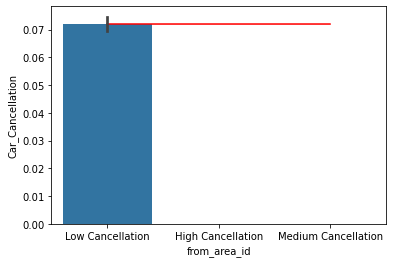

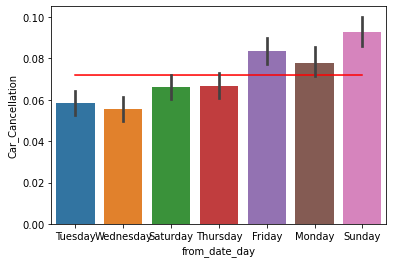

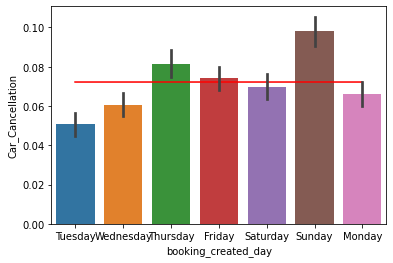

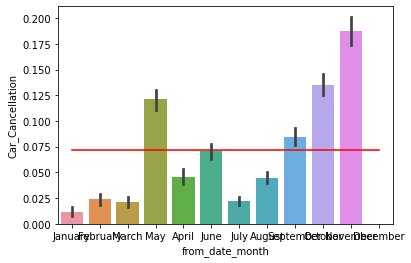

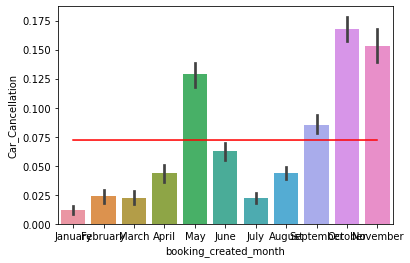

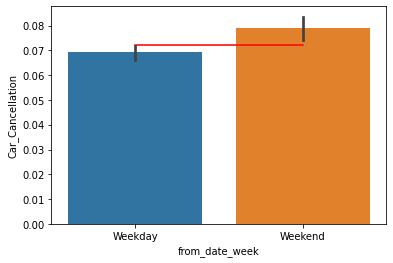

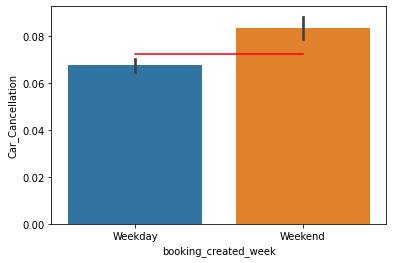

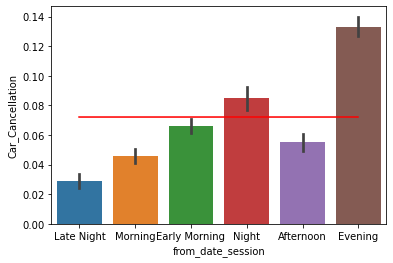

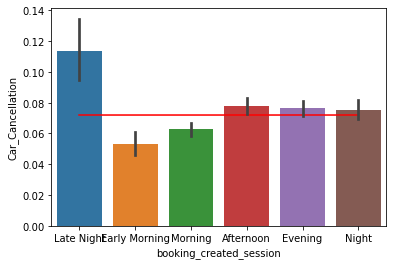

In [140]:
X_char_merged = pd.concat([char,target],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['Car_Cancellation'].mean(), data=X_char_merged,estimator=mean, color='red')
    sns.barplot(x=col, y='Car_Cancellation', data=X_char_merged,estimator=mean)
plt.show()

In [141]:
a = df[['online_booking','mobile_site_booking']]

<AxesSubplot:>

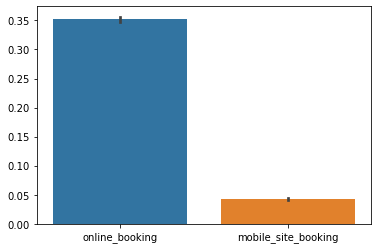

In [142]:
sns.barplot(data=a)

Maximum Booking was done on Online.
This can be helpful in promoting digital marketing. where and when to invest